# Tuning the ARIMA model Automatically
## Adding examples of using Mango on Time-Series Models

## Take a sample dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [2]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Plot the series to see the trend and seasonality

In [3]:
#!pip install matplotlib

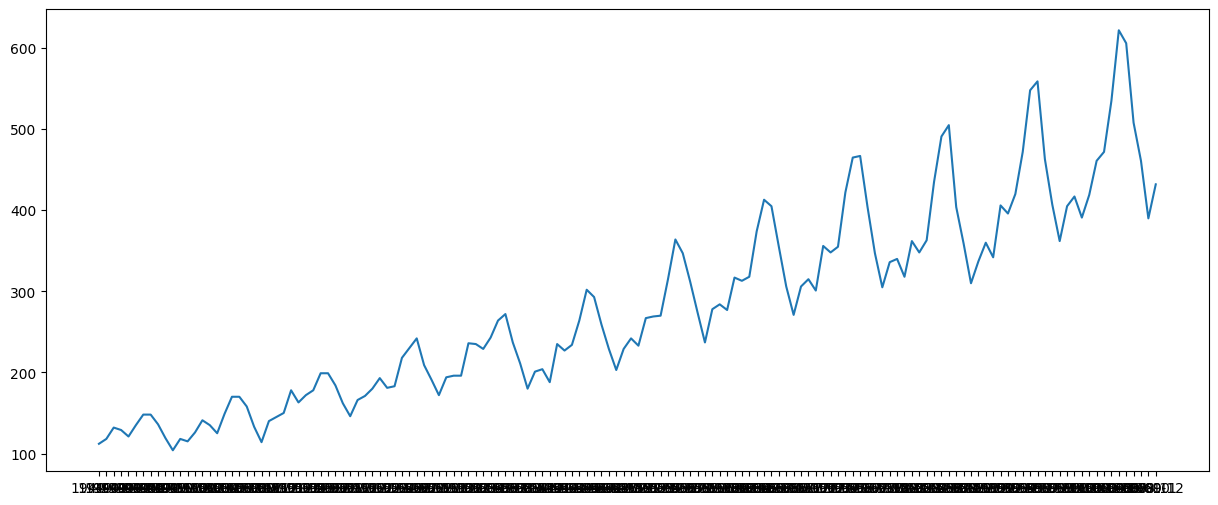

In [4]:
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(df['Month'], df['#Passengers'])

plt.show()

In [5]:
# install statsmodels if not done
#!pip install statsmodels

# Objective function of the Arima model

In [6]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import scheduler, Tuner

def arima_objective_function(args_list):
    global data_values
    
    params_evaluated = []
    results = []
    
    for params in args_list:
        try:
            p,d,q = params['p'],params['d'], params['q']
            trend = params['trend']
            
            model = ARIMA(data_values, order=(p,d,q), trend = trend)
            predictions = model.fit()

            mse = mean_squared_error(data_values, predictions.fittedvalues)   
            params_evaluated.append(params)
            results.append(mse)
        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            results.append(1e5)
        
        #print(params_evaluated, mse)
    return params_evaluated, results

# Define parameter space

In [7]:
param_space = dict(p= range(1, 10),
                   d= range(1, 10),
                   q =range(1, 10),
                   trend = ['n', 'c', 't', 'ct']
                  )

In [8]:
conf_Dict = dict()
conf_Dict['num_iteration'] = 100

In [9]:
data_values = list(df['#Passengers'])

In [10]:
tuner = Tuner(param_space, arima_objective_function, conf_Dict)

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category

results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

  0%|          | 0/100 [00:00<?, ?it/s]

best parameters: {'d': 1, 'p': 9, 'q': 8, 'trend': 't'}
best loss: 316.3015346779727


# Def plot best model results

In [12]:
def plot_arima(data_values, order = (1,1,1), trend = 'c'):
    print('final model:', order, trend)
    model = ARIMA(data_values, order=order, trend = trend)
    results = model.fit()
    
    error = mean_squared_error(data_values, results.fittedvalues)   
    print('MSE error is:', error)
    
    from matplotlib import pyplot as plt
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(6)
    plt.plot(data_values)
    plt.plot(results.fittedvalues, color='red')
    plt.show()

{'d': 1, 'p': 9, 'q': 8, 'trend': 't'}
final model: (9, 1, 8) t
MSE error is: 316.3015346779727


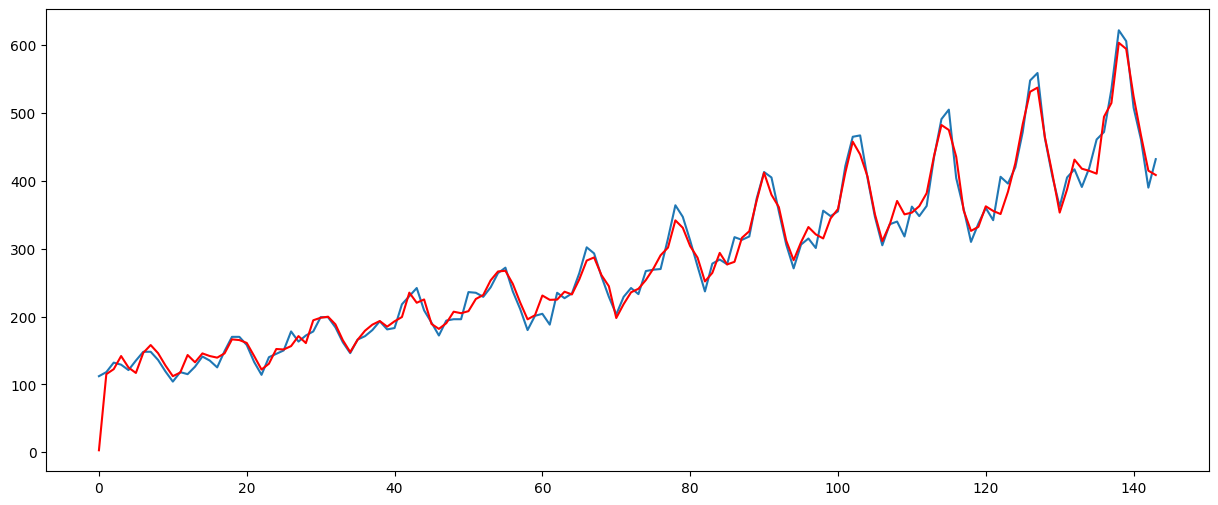

In [13]:
print(results['best_params'])

order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
plot_arima(data_values, order=order, trend = results['best_params']['trend'])